<a href="https://colab.research.google.com/github/FenryrMKIII/objectDetection-detectron2/blob/master/Symbol_recognition_Detectron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optional : install some Python modules. Normally already available on colab

In [0]:
# # Install OpenCV lib
# # necessary if OPENCV=1 option is chosen when compiling darknet

# # First update
# !apt-get update
# !apt-get upgrade

# # Then install bunch of stuff necessary to install opencv (don't know why, found that on internet)
# !apt-get install build-essential
# !apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev
# !apt-get install libavcodec-dev libavformat-dev libswscale-d

# # Eventually install opencv
# !apt-get install libopencv-dev


# Connect to google drive for storage

In [2]:
from google.colab import drive
drive.mount('gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive


In [11]:
# Verify google drive's writing capabilities
# may happen that colab connects to a "shadow" session impeding
# data saving 
!touch "/content/gdrive/My Drive/dataManagement/lightnet/backup/yalah.txt"
!ls "/content/gdrive/My Drive/dataManagement/lightnet/backup/"

touch: cannot touch '/content/gdrive/My Drive/dataManagement/lightnet/backup/yalah.txt': Transport endpoint is not connected
ls: cannot access '/content/gdrive/My Drive/dataManagement/lightnet/backup/': Transport endpoint is not connected


# Check GPU capabilities

In [12]:
# check you are on GPU
# if command fails ... You are not on GPU !!

!nvidia-smi
# check cuda is installed
!cat /proc/driver/nvidia/version # verify driver version
!nvcc -V # verify cuda version

Mon Feb 10 17:02:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [13]:
# check cuda version
!/usr/local/cuda/bin/nvcc --version

# check linux version
!lsb_release -a

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.3 LTS
Release:	18.04
Codename:	bionic


In [14]:
# cuda is different from cuDNN
# cuDNN stands for Deep Neural Networks !
# Need to download cuDNN version applicable with installed cuda version !

!mkdir -p "/content/cudnn" 
! cp -r "/content/gdrive/My Drive/cuDNN/cudnn-10.0-linux-x64-v7.6.3.30.tgz" "/content/cudnn"

# cudnn archive was downloaded from nvidia cudnn website, requires free subscription to nvidia website
# download archive for installed cuda version (see output cell above) and choose the "linux library" link (not the linux version specific)
# to get a targz archive (not a deb !)

%cd /content/cudnn
!tar -xzvf cudnn-10.0-linux-x64-v7.6.3.30.tgz
!cp cuda/include/cudnn.h /usr/local/cuda/include # required otherwise compilation of darknet wil fail
!cp cuda/lib64/libcudnn* /usr/local/cuda/lib64 # same story !take care architecture dependent, here 64bits
!chmod a+r /usr/local/cuda/include/cudnn.h /usr/local/cuda/lib64/libcudnn* # make file property adequate

%cd /content

cp: cannot stat '/content/gdrive/My Drive/cuDNN/cudnn-10.0-linux-x64-v7.6.3.30.tgz': Transport endpoint is not connected
/content/cudnn
tar (child): cudnn-10.0-linux-x64-v7.6.3.30.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
cp: cannot stat 'cuda/include/cudnn.h': No such file or directory
cp: cannot stat 'cuda/lib64/libcudnn*': No such file or directory
chmod: cannot access '/usr/local/cuda/include/cudnn.h': No such file or directory
chmod: cannot access '/usr/local/cuda/lib64/libcudnn*': No such file or directory
/content


# Download lightnet yolo implementation

In [3]:
!git clone https://github.com/FenryrMKIII/objectDetection-lightnet.git
%cd objectDetection-lightnet
!sudo pip3 install -r develop.txt


Cloning into 'objectDetection-lightnet'...
remote: Enumerating objects: 2530, done.
remote: Counting objects: 100% (2530/2530), done.
remote: Compressing objects: 100% (866/866), done.
remote: Total 2530 (delta 1649), reused 2522 (delta 1641), pack-reused 0
Receiving objects: 100% (2530/2530), 5.74 MiB | 13.83 MiB/s, done.
Resolving deltas: 100% (1649/1649), done.
/content/objectDetection-lightnet
Obtaining file:///content/objectDetection-lightnet (from -r develop.txt (line 13))
     |████████████████████████████████| 768kB 4.9MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 6.4MB 20.7MB/s 
     |████████████████████████████████| 51kB 9.8MB/s 
     |████████████████████████████████| 286kB 69.6MB/s 
  Created wheel for oset: filename=oset-0.1.3-cp36-none-any.whl size=9661 sha256=50a9a3d169d530718c6484a4928e6740dc9076acee95fd2aba2cbbb2dba85418
  Stored in directory: /root/.cache/pip/wheels/4e/87/c8/3dad2dca279f64fb68af5d9908c380fee2f1648

In [3]:
# check lightnetversion
import lightnet
print(lightnet.__version__)

1.1.1


In [7]:
# in case changes are made to the repo
%cd /content/objectDetection-lightnet
!git pull
%cd /content/objectDetection-lightnet/

/content/objectDetection-lightnet
Already up to date.
/content/objectDetection-lightnet


#Create training set

In [4]:
# create the dataset
# using a homemade script to create "overlayed"
# pictures. 
! git clone "https://github.com/FenryrMKIII/objectDetection-overlay"

Cloning into 'objectDetection-overlay'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 126 (delta 36), reused 114 (delta 24), pack-reused 0
Receiving objects: 100% (126/126), 2.51 MiB | 8.28 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [1]:
# in case changes are made to the repo
%cd /content/objectDetection-lightnet/objectDetection-overlay
!git pull
%cd /content/objectDetection-lightnet/

[Errno 2] No such file or directory: '/content/objectDetection-lightnet/objectDetection-overlay'
/content
fatal: not a git repository (or any of the parent directories): .git
[Errno 2] No such file or directory: '/content/objectDetection-lightnet/'
/content


In [5]:
# install albumentations
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-jacvhz3c
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-jacvhz3c
     |████████████████████████████████| 634kB 5.1MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.4-cp36-none-any.whl size=64202 sha256=6cdf0f787f93ae45ed9f6c77dc28451b8a191eaa18fa18a7827ebb6a1b4cc6bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-ob_9e7or/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=2c9ad588dc0f3309ce2ece96ae6510690f41965e8dd1c4becbb06ba6485b7af0
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
  

In [0]:
# create dataset with the tool
!python3 objectDetection-overlay/overlay.py  -t "overlay" -o "objectDetection-overlay/rawSymbols" -b "objectDetection-overlay/backGrounds" --noAlpha

In [7]:
# put dataset at appropriate location for training
!rm -r data/images/valves/
!mkdir --parents data/images/valves/
!mv trainingSet/* data/images/valves/

rm: cannot remove 'data/images/valves/': No such file or directory


In [8]:
# save trainingset to drive for possible further usage
!mkdir "/content/gdrive/My Drive/dataManagement/lightnet/backup/trainingSet"
!cp -r data/images/valves/. "/content/gdrive/My Drive/dataManagement/lightnet/backup/trainingSet/."

mkdir: cannot create directory ‘/content/gdrive/My Drive/dataManagement/lightnet/backup/trainingSet’: File exists


In [0]:
# bring back trainingSet from drive
!mkdir --parents data/images/valves/
!cp -rf --verbose "/content/gdrive/My Drive/dataManagement/lightnet/backup/trainingSet/." data/images/valves/.

In [9]:
# install brambox
pip install brambox 

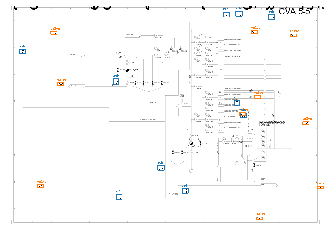

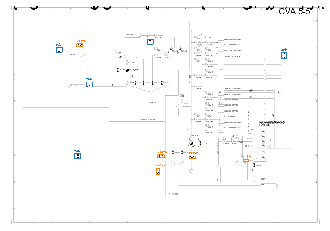

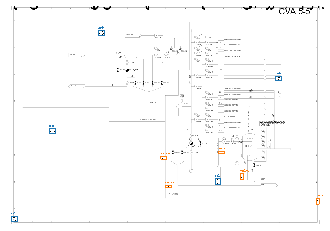

In [10]:
# check some generated pictures along with bounding box
import os
import cv2
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import brambox
from PIL import Image
from pathlib import Path

path = Path(r"data/images/valves/")

anno = []
images = []

for file in path.iterdir():
    if file.suffix == ".txt":
        anno.append(file)
    elif file.suffix == ".png":
        images.append(file)

def getImageDims(id):
    root = Path(r"data/images/valves/")
    im = Image.open(Path.joinpath(root, id + ".png"))
    width, height = im.size
    return (width, height)

class_label_map = ["rob", "valve"]
samples = np.random.choice(np.arange(0,len(anno)), size = 3)
samples = [anno[i] for i in samples]
test = brambox.io.load(brambox.io.parser.annotation.DarknetParser(getImageDims, class_label_map), samples)

drawer = brambox.util.BoxDrawer(
    images=lambda img: Path.joinpath(path, img + ".png"),  # Function to retrieve image path from image column name
    boxes=test,
    label=test.class_label,                 # Write class_label above boxes
)

vizu = True
for i, thing in enumerate(drawer) :
    plt.axis('off')
    gdrivePath = Path(r"/content/gdrive/My Drive/dataManagement/lightnet/backup/examplesBBOX")
    if not gdrivePath.exists():
      gdrivePath.mkdir()
    savePath = Path(r"/content/gdrive/My Drive/dataManagement/lightnet/backup/examplesBBOX").joinpath(str(i)+'.png')
    cv2.imwrite(str(savePath), np.asarray(thing))

    plt.imshow(np.asarray(thing))
    if vizu : 
      plt.show()
    
    



# Configure architecture, parameters, training

### Compute anchors on dataset

In [5]:
# clone alexeyAB darknet
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 12441, done.
remote: Total 12441 (delta 0), reused 0 (delta 0), pack-reused 12441
Receiving objects: 100% (12441/12441), 11.38 MiB | 23.40 MiB/s, done.
Resolving deltas: 100% (8488/8488), done.


In [6]:
%cd darknet
!make

/content/objectDetection-lightnet/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:247:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
gcc -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘convolution_2d’:
./src/gemm.c:2039:15: warning: unused variable ‘out_w’ [-Wunused-variable]
     const int out_w = (w + 2 * pad - ksize) / str

In [0]:
# create training file 
from pathlib import Path
fileNames = []
with open(r'data/symbolPerso.txt', 'w') as f:
  for file in Path(r'/content/objectDetection-lightnet/data/images/valves').iterdir():
    if file.suffix == '.png':
      f.write(str(file.parent.joinpath(file.name +'\n'))) 

In [0]:
with open(r'data/valves.names', 'w') as f:
  f.write('rob\n')
  f.write('valve\n')
  


In [19]:
# save edited file
# valid data are dummy data
%%writefile data/symbolPerso.data
classes= 80
train  = data/symbolPerso.txt
valid  = data/coco_testdev 
names = data/coco.names
backup = backup/

Writing data/symbolPerso.data


In [21]:
# compute anchors using already available coco setting of AlexeyAB darknet
!./darknet detector calc_anchors data/symbolPerso.data -num_of_clusters 9 -width 416 -height 416

 OpenCV isn't used 

 num_of_clusters = 9, width = 416, height = 416 
 read labels from 100 images 
 loaded 	 image: 100 	 box: 1242
 all loaded. 

 calculating k-means++ ...

 iterations = 6 


 avg IoU = 96.31 % 

Saving anchors to the file: anchors.txt 
anchors =   8,  4,   8,  4,   8,  4,   8,  8,   8,  8,   8,  8,   8,  8,   8,  8,   6, 12
^C


### Configure training files

In [0]:
# show
%pycat example/cfg/yolo.py

In [11]:
# write configuration file with desired modifictions
%%writefile example/cfg/yolo.py

import lightnet as ln
import torch

__all__ = ['params']


params = ln.engine.HyperParameters( 
    # Network
    class_label_map = ['rob', 'valve'],
    _input_dimension = (1024, 1024),
    _batch_size = 32,
    _mini_batch_size = 4,
    _max_batches = 80200,

    # Dataset
    _train_set = 'train.h5',
    _test_set = 'test.h5',
    _filter_anno = 'ignore',

    # Data Augmentation
    _jitter = 0.0,
    _flip = 0.0,
    _hue = 0.0,
    _saturation = 0.0,
    _value = 0.0,
)

# Network
def init_weights(m):
    if isinstance(m, torch.nn.Conv2d):
        torch.nn.init.kaiming_normal_(m.weight, nonlinearity='leaky_relu')

params.network = ln.models.YoloV3(len(params.class_label_map))
params.network.apply(init_weights)
params.network.anchors = [[(8, 4), (8, 4), (8, 4)], [(8, 8), (8, 8), (8, 8)], [(8, 8), (8, 8), (6, 12)]] 


# Loss
params.loss = ln.network.loss.MultiScaleRegionLoss(
    len(params.class_label_map),
    params.network.anchors,
    params.network.stride,
)

# Postprocessing
params._post = ln.data.transform.Compose([
    ln.data.transform.GetMultiScaleBoundingBoxes(len(params.class_label_map), params.network.anchors, 0.001),
    ln.data.transform.NonMaxSuppression(0.5),
    ln.data.transform.TensorToBrambox(params.input_dimension, params.class_label_map),
])

# Optimizer
params.optimizer = torch.optim.SGD(
    params.network.parameters(),
    lr = .001,
    momentum = .9,
    weight_decay = .0005,
    dampening = 0,
)

# Scheduler
burn_in = torch.optim.lr_scheduler.LambdaLR(
    params.optimizer,
    lambda b: (b / 1000) ** 4,
)
step = torch.optim.lr_scheduler.MultiStepLR(
    params.optimizer,
    milestones = [40000, 60000],
    gamma = .1,
)
params.scheduler = ln.engine.SchedulerCompositor(
#   batch   scheduler
    (0,     burn_in),
    (1000,  step),
)


Overwriting example/cfg/yolo.py


In [0]:
# show
%pycat example/bin/train.py

In [12]:
%%writefile example/bin/train.py

#!/usr/bin/env python
import os
import logging
import time
import argparse
from math import isinf, isnan
from statistics import mean
import torch
import visdom
import numpy as np
import lightnet as ln
from datasetPerso import valveDataset
from pathlib import Path
import brambox as bb
from PIL import Image

log = logging.getLogger('lightnet.VOC.train')


class TrainEngine(ln.engine.Engine):
    def start(self):
        self.params.to(self.device)
        self.dataloader.change_input_dim()
        self.optimizer.zero_grad()

        self.train_loss = {'tot': [], 'coord': [], 'conf': [], 'cls': []}
        self.plot_train_loss = ln.engine.LinePlotter(self.visdom, 'train_loss', opts=dict(xlabel='Batch', ylabel='Loss', title='Training Loss', showlegend=True, legend=['Total loss', 'Coordinate loss', 'Confidence loss', 'Class loss']))
        self.plot_lr = ln.engine.LinePlotter(self.visdom, 'learning_rate', name='Learning Rate', opts=dict(xlabel='Batch', ylabel='Learning Rate', title='Learning Rate Schedule'))
        self.batch_end(self.plot_rate)(self.plot)

    def process_batch(self, data):
        data, target = data
        data = data.to(self.device)

        out = self.network(data)
        loss = self.loss(out, target) / self.batch_subdivisions
        loss.backward()

        self.train_loss['tot'].append(self.loss.loss_tot.item())
        self.train_loss['coord'].append(self.loss.loss_coord.item())
        self.train_loss['conf'].append(self.loss.loss_conf.item())
        self.train_loss['cls'].append(self.loss.loss_cls.item())

    def train_batch(self):
        self.optimizer.step()
        self.optimizer.zero_grad()
        self.scheduler.step(self.batch, epoch=self.batch)

        # Get values from last batch
        tot = mean(self.train_loss['tot'][-self.batch_subdivisions:])
        coord = mean(self.train_loss['coord'][-self.batch_subdivisions:])
        conf = mean(self.train_loss['conf'][-self.batch_subdivisions:])
        cls = mean(self.train_loss['cls'][-self.batch_subdivisions:])
        self.log(f'{self.batch} Loss:{tot:.5f} (Coord:{coord:.2f} Conf:{conf:.2f} Cls:{cls:.2f})')

        if isinf(tot) or isnan(tot):
            log.error('Infinite loss')
            self.sigint = True
            return

    def plot(self):
        tot = mean(self.train_loss['tot'])
        coord = mean(self.train_loss['coord'])
        conf = mean(self.train_loss['conf'])
        cls = mean(self.train_loss['cls'])
        self.train_loss = {'tot': [], 'coord': [], 'conf': [], 'cls': []}

        self.plot_train_loss(np.array([[tot, coord, conf, cls]]), np.array([self.batch]))
        self.plot_lr(np.array([self.optimizer.param_groups[0]['lr']]), np.array([self.batch]))

    @ln.engine.Engine.batch_end(500)
    def backup(self):
        self.params.save(os.path.join(self.backup_folder, f'weights_{self.batch}.state.pt'))
        log.info(f'Saved backup')

    @ln.engine.Engine.batch_end(10)
    def resize(self):
        if self.batch >= self.max_batches - 200:
        	self.dataloader.change_input_dim(self.input_dimension, None)
        else:
        	self.dataloader.change_input_dim()

    def quit(self):
        if self.batch >= self.max_batches:
            self.params.network.save(os.path.join(self.backup_folder, 'final.pt'))
            return True
        elif self.sigint:
            self.params.save(os.path.join(self.backup_folder, 'backup.state.pt'))
            return True
        else:
            return False


if __name__ == '__main__':
    parser = argparse.ArgumentParser(
        description='Train network',
        formatter_class=argparse.ArgumentDefaultsHelpFormatter
    )
    parser.add_argument('weight', help='Path to weight file', default=None, nargs='?')
    parser.add_argument('-n', '--network', help='network config file', required=True)
    parser.add_argument('-c', '--cuda', action='store_true', help='Use cuda')
    parser.add_argument('-b', '--backup', metavar='folder', help='Backup folder', default='./backup')
    parser.add_argument('-v', '--visdom', action='store_true', help='Visualize training data with visdom')
    parser.add_argument('-e', '--visdom_env', help='Visdom environment to plot to', default='main')
    parser.add_argument('-p', '--visdom_port', help='Port of the visdom server', type=int, default=8080)
    parser.add_argument('-r', '--visdom_rate', help='How often to plot to visdom (batches)', type=int, default=1)
    parser.add_argument('-a', '--anno', help='annotation folder', default='./data')
    args = parser.parse_args()

    # Parse arguments
    device = torch.device('cpu')
    if args.cuda:
        if torch.cuda.is_available():
            log.debug('CUDA enabled')
            device = torch.device('cuda')
        else:
            log.error('CUDA not available')

    if not os.path.isdir(args.backup):
        if not os.path.exists(args.backup):
            log.warning('Backup folder does not exist, creating...')
            os.makedirs(args.backup)
        else:
            raise ValueError('Backup path is not a folder')
    
    if args.visdom:
        visdom = visdom.Visdom(port=args.visdom_port, env=args.visdom_env)
    else:
        visdom = None

    params = ln.engine.HyperParameters.from_file(args.network)
    if args.weight is not None:
        if args.weight.endswith('.state.pt'):
            params.load(args.weight)
        else:
            params.network.load(args.weight, strict=False)  # Disable strict mode for loading partial weights

   # Dataloader
    dataPath = Path(args.anno)
    training_loader = ln.data.DataLoader(
        valveDataset(dataPath, params, False),
        batch_size = params.mini_batch_size,
        shuffle = True,
        drop_last = True,
        num_workers = 1,
        pin_memory = True,
        collate_fn = ln.data.brambox_collate,
    )

    # Start training
    eng = TrainEngine(
        params, training_loader,
        device=device, visdom=visdom, plot_rate=args.visdom_rate, backup_folder=args.backup
    )
    b1 = eng.batch
    t1 = time.time()
    eng()
    t2 = time.time()
    b2 = eng.batch
    log.info(f'Training {b2-b1} batches took {t2-t1:.2f} seconds [{(t2-t1)/(b2-b1):.3f} sec/batch]')

Overwriting example/bin/train.py


# Configure path to pictures

In [13]:
# Modify datasetPerso.py to correctly
# identify the path where images & annotations are stored
# no automated way at the moment

%%writefile example/bin/datasetPerso.py

import copy
import logging
from PIL import Image
import torch
from torchvision import transforms as tf
import brambox as bb
import lightnet as ln
from pathlib import Path

__all__ = ['valveDataset']
log = logging.getLogger('lightnet.valve.dataset')

# one needs to define  this function at the top of the module
# otherwhise, Python raises a "Can't picle local object error"
# when going multiprocessing
# This is apparently specific to Windows ... ?

def identify_file(img_id):
    root = Path(r"/content/objectDetection-lightnet/data/images/valves")
    return Path.joinpath(root, img_id + '.png')

class valveDataset(ln.models.BramboxDataset):
    """ valves dataset, with annotations generated by `brambox.io.parser.DarknetParser`

    Args:
        anno_path (str or Path): Path to annotation location (must be parseable by DarknetParser)
        params (lightnet.engine.HyperParameters): Hyperparameters for this data (See Note)
        augment (boolean): Whether to perform data augmentation
        kwargs (optional): extra keyword arguments to pass on to the `brambox.io.load()` function

    Note:
        The hyperparameters object should at least contain the following attributes:

        - params.input_dimension (tuple): tuple containing base (width,height) for the network
        - params.class_label_map (list): List of class_labels (can be **None**, but this might lead to undeterministic behaviour)
        - params.anno_filter (str, optional): How to filter difficult annotations: ['ignore', 'rm', 'none']; Default **'none'**
        - params.flip (float): chance to flip the image
        - params.jitter (float): jitter percentage
        - params.hue (float): Hue change percentage
        - params.saturation (float): Saturation change percentage
        - params.value (float): Value change percentage
    """
    def __init__(self, anno_path, params, augment, **kwargs):        
        
        anno_path = Path(anno_path)
        anno = []
        for file in anno_path.iterdir():
            if file.suffix == ".txt":
                anno.append(file)

        # Create dataframe containig all annotations data
        # data has to be structured as expected i.e.
        # one data folder containing images & annotations structured like 
        #
        # image000.txt, image000.png
        # image001.txt, image000.png
        #
        # the names don't matter BUT they must be consistent between annotation & related picture
        # also the annotations must be in Darknet brambox format i.e.
        #
        # label xcenter ycenter width height
        #
        # all expressed relative to the total image width and height
        # origin for the coordinates is the bottom left corner of the picture

        def getImageDims(id):
            # hardcoded at the moment ... did not yet find/implemented a proper way
            root = Path(r"/content/objectDetection-lightnet/data/images/valves")
            im = Image.open(Path.joinpath(root, id + ".png"))
            width, height = im.size
            return (width, height)
            
        annos = bb.io.load(bb.io.parser.annotation.DarknetParser(getImageDims, params.class_label_map), anno)

        img_tf = ln.data.transform.Compose([tf.ToTensor()])
        anno_tf = None
        if augment :
            rf  = ln.data.transform.RandomFlip(params.flip)
            rc  = ln.data.transform.RandomJitter(params.jitter, True, 0.1)
            hsv = ln.data.transform.RandomHSV(params.hue, params.saturation, params.value)
            img_tf[0:0] = [hsv, rc, rf]
            anno_tf[0:0] = [rc, rf]




        super().__init__(annos, params.input_dimension, params.class_label_map, identify_file, img_tf, anno_tf)


Overwriting example/bin/datasetPerso.py


# Train on personal dataset

In [0]:
# Fetch pre-trained weights
# those weights are stored on drive and were downloaded from lightnet repo https://gitlab.com/EAVISE/lightnet/blob/master/docs/notes/02-C-pascal_voc.rst
!mkdir /content/objectDetection-lightnet/data/weights
!cp -r "/content/gdrive/My Drive/dataManagement/lightnet/backup/yolov3-coco.pt" /content/objectDetection-lightnet/data/weights/.

In [0]:
# or fetch weights from previous training
!mkdir /content/objectDetection-lightnet/data/weights
!cp -r "/content/gdrive/My Drive/dataManagement/lightnet/backup/weights_21000.state.pt" "/content/objectDetection-lightnet/data/weights/."

In [15]:
# install missing packages
pip install visdom

     |████████████████████████████████| 686kB 4.8MB/s 
     |████████████████████████████████| 204kB 24.7MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655250 sha256=e8d8593ae1a87c5f78b36ad2f1c0cadb76de0b9f623c51f8292060fce367f50f
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5712 sha256=fc2721ebafe54d5812bde395a42542767ec1f49cd3c65249990837afa0fde10c
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


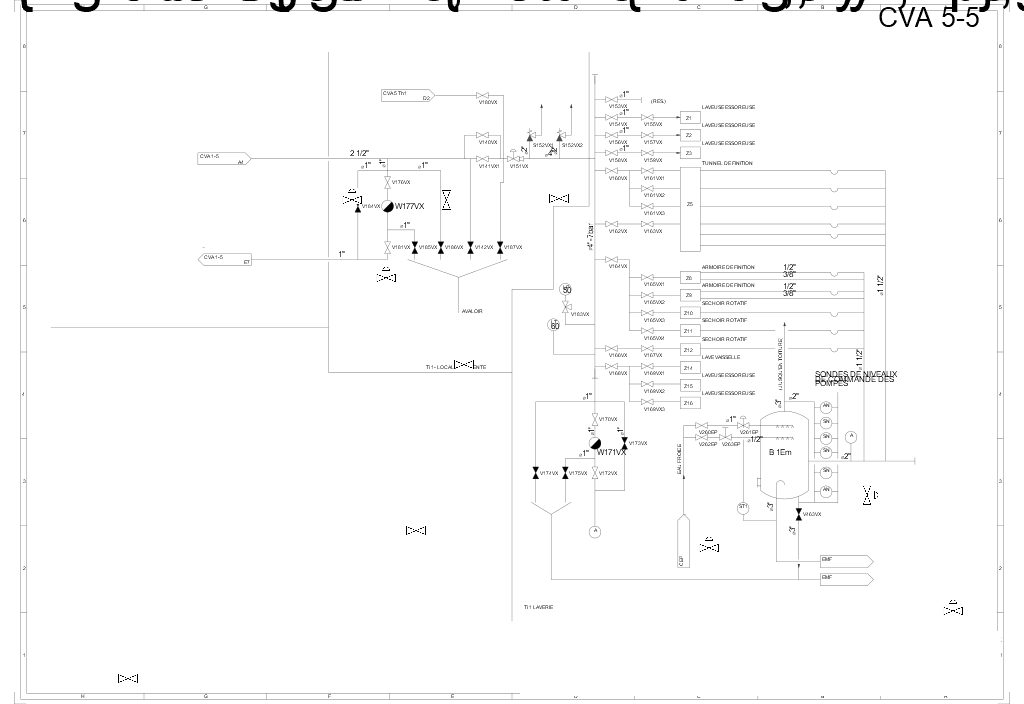

In [16]:
# check some training pictures
from google.colab.patches import cv2_imshow
im = cv2.imread('data/images/valves/train_sample_0.png')
cv2_imshow(im)

In [17]:
%%writefile lightnet/network/loss/_regionloss.py
#   Darknet RegionLoss
#   Copyright EAVISE
#

import math
import numpy as np
import torch
import torch.nn as nn
from distutils.version import LooseVersion

try:
    import pandas as pd
except ModuleNotFoundError:
    pd = None

__all__ = ['RegionLoss']

torchversion = LooseVersion(torch.__version__)
version120 = LooseVersion("1.2.0")


class RegionLoss(nn.modules.loss._Loss):
    """ Computes region loss from darknet network output and target annotation.

    Args:
        num_classes (int): number of classes to detect
        anchors (list): 2D list representing anchor boxes (see :class:`lightnet.network.Darknet`)
        stride (optional, int): The downsampling factor of the network (input_dimension / output_dimension); Default **32**
        seen (optional, torch.Tensor): How many images the network has already been trained on; Default **0**
        coord_scale (optional, float): weight of bounding box coordinates; Default **1.0**
        noobject_scale (optional, float): weight of regions without target boxes; Default **1.0**
        object_scale (optional, float): weight of regions with target boxes; Default **5.0**
        class_scale (optional, float): weight of categorical predictions; Default **1.0**
        thresh (optional, float): minimum iou between a predicted box and ground truth for them to be considered matching; Default **0.6**
        coord_prefill (optional, int): This parameter controls for how many images the network will prefill the target coordinates, biassing the network to predict the center at **.5,.5**; Default **12800**
    """
    def __init__(self, num_classes, anchors, stride=32, seen=0, coord_scale=1.0, noobject_scale=1.0, object_scale=5.0, class_scale=1.0, thresh=0.6, coord_prefill=12800):
        super().__init__()
        self.num_classes = num_classes
        self.num_anchors = len(anchors)
        self.anchor_step = len(anchors[0])
        self.anchors = torch.Tensor(anchors)
        self.stride = stride
        self.register_buffer('seen', torch.tensor(seen))

        self.coord_scale = coord_scale
        self.noobject_scale = noobject_scale
        self.object_scale = object_scale
        self.class_scale = class_scale
        self.thresh = thresh
        self.coord_prefill = coord_prefill

        self.mse = nn.MSELoss(reduction='sum')
        self.cel = nn.CrossEntropyLoss(reduction='sum')

    def extra_repr(self):
        repr_str = f'classes={self.num_classes}, stride={self.stride}, threshold={self.thresh}, seen={self.seen.item()}\n'
        repr_str += f'coord_scale={self.coord_scale}, object_scale={self.object_scale}, noobject_scale={self.noobject_scale}, class_scale={self.class_scale}\n'
        repr_str += f'anchors='
        for a in self.anchors:
            repr_str += f'[{a[0]:.5g}, {a[1]:.5g}] '
        return repr_str

    def forward(self, output, target, seen=None):
        """ Compute Region loss.

        Args:
            output (torch.autograd.Variable): Output from the network
            target (brambox annotation dataframe or torch.Tensor): Brambox annotations or tensor containing the annotation targets (see :class:`lightnet.data.BramboxToTensor`)
            seen (int, optional): How many images the network has already been trained on; Default **Add batch_size to previous seen value**

        Note:
            If using a target tensor, it should have the dimensions `[num_batch, num_anno, 5]` and following format per image:

            .. math::

                \\begin{bmatrix}
                    class\\_idx & x\\_center & y\\_center & width & height \\\\
                    class\\_idx & x\\_center & y\\_center & width & height \\\\
                    ... \\\\
                    -1 & 0 & 0 & 0 & 0 \\\\
                    -1 & 0 & 0 & 0 & 0 \\\\
                    ...
                \\end{bmatrix}

            With all coordinates being relative to the image size. |br|
            Since the annotations from all images of a batch should be made of the same length, you can pad them with: `[-1, 0, 0, 0, 0]`.

        Note:
            Besides being easier to work with, brambox dataframes have the added benefit that
            this loss function will also consider the ``ignore`` flag of annotations and ignore detections that match with it.
            This allows you to have annotations that will not influence the loss in any way,
            as opposed to having them removed and counting them as false detections.
        """
        # Parameters
        nB = output.data.size(0)
        nA = self.num_anchors
        nC = self.num_classes
        nH = output.data.size(2)
        nW = output.data.size(3)
        nPixels = nH * nW
        device = output.device
        if seen is not None:
            self.seen = torch.tensor(seen)
        elif self.training:
            self.seen += nB

        # Get x,y,w,h,conf,cls
        output = output.view(nB, nA, -1, nPixels)
        coord = torch.zeros_like(output[:, :, :4])
        coord[:, :, :2] = output[:, :, :2].sigmoid()    # tx,ty
        coord[:, :, 2:4] = output[:, :, 2:4]            # tw,th
        conf = output[:, :, 4].sigmoid()
        if nC > 1:
            cls = output[:, :, 5:].contiguous().view(nB*nA, nC, nPixels).transpose(1, 2).contiguous().view(-1, nC)

        # Create prediction boxes
        pred_boxes = torch.FloatTensor(nB*nA*nPixels, 4)
        lin_x = torch.linspace(0, nW-1, nW).repeat(nH, 1).view(nPixels).to(device)
        lin_y = torch.linspace(0, nH-1, nH).view(nH, 1).repeat(1, nW).view(nPixels).to(device)
        anchor_w = self.anchors[:, 0].contiguous().view(nA, 1).to(device)
        anchor_h = self.anchors[:, 1].contiguous().view(nA, 1).to(device)

        pred_boxes[:, 0] = (coord[:, :, 0].detach() + lin_x).view(-1)
        pred_boxes[:, 1] = (coord[:, :, 1].detach() + lin_y).view(-1)
        pred_boxes[:, 2] = (coord[:, :, 2].detach().exp() * anchor_w.float()).view(-1)
        pred_boxes[:, 3] = (coord[:, :, 3].detach().exp() * anchor_h.float()).view(-1)
        pred_boxes = pred_boxes.cpu()

        # Get target values
        coord_mask, conf_mask, cls_mask, tcoord, tconf, tcls = self.build_targets(pred_boxes, target, nB, nH, nW)
        coord_mask = coord_mask.expand_as(tcoord).to(device).sqrt()
        conf_mask = conf_mask.to(device).sqrt()
        tcoord = tcoord.to(device)
        tconf = tconf.to(device)
        if nC > 1:
            tcls = tcls[cls_mask].view(-1).long().to(device)
            cls_mask = cls_mask.view(-1, 1).repeat(1, nC).to(device)
            cls = cls[cls_mask].view(-1, nC)

        # Compute losses
        self.loss_coord = self.coord_scale * self.mse(coord*coord_mask, tcoord*coord_mask) / (2 * nB)
        self.loss_conf = self.mse(conf*conf_mask, tconf*conf_mask) / (2 * nB)
        if nC > 1:
            if tcls.numel() > 0:
                self.loss_cls = self.class_scale * self.cel(cls, tcls) / nB
            else:
                self.loss_cls = torch.tensor(0.0).to(device)
            self.loss_tot = self.loss_coord + self.loss_conf + self.loss_cls
        else:
            self.loss_cls = torch.tensor(0.0)
            self.loss_tot = self.loss_coord + self.loss_conf

        return self.loss_tot

    def build_targets(self, pred_boxes, ground_truth, nB, nH, nW):
        """ Compare prediction boxes and targets, convert targets to network output tensors """
        if torch.is_tensor(ground_truth):
            return self.__build_targets_tensor(pred_boxes, ground_truth, nB, nH, nW)
        elif pd is not None and isinstance(ground_truth, pd.DataFrame):
            return self.__build_targets_brambox(pred_boxes, ground_truth, nB, nH, nW)
        else:
            raise TypeError(f'Unkown ground truth format [{type(ground_truth)}]')

    def __build_targets_tensor(self, pred_boxes, ground_truth, nB, nH, nW):
        """ Compare prediction boxes and ground truths, convert ground truths to network output tensors """
        # Parameters
        nT = ground_truth.size(1)
        nA = self.num_anchors
        nAnchors = nA*nH*nW
        nPixels = nH*nW

        # Tensors
        coord_mask = torch.zeros(nB, nA, nH, nW, requires_grad=False)
        conf_mask = torch.ones(nB, nA, nH, nW, requires_grad=False) * self.noobject_scale
        if torchversion >= version120:
            cls_mask = torch.zeros(nB, nA, nH, nW, dtype=torch.bool, requires_grad=False)
        else:
            cls_mask = torch.zeros(nB, nA, nH, nW, requires_grad=False).byte()
        tcoord = torch.zeros(nB, nA, 4, nH, nW, requires_grad=False)
        tconf = torch.zeros(nB, nA, nH, nW, requires_grad=False)
        tcls = torch.zeros(nB, nA, nH, nW, requires_grad=False)

        if self.training and self.seen < self.coord_prefill:
            coord_mask.fill_(math.sqrt(.01 / self.coord_scale))
            if self.anchor_step == 4:
                tcoord[:, :, 0] = self.anchors[:, 2].contiguous().view(1, nA, 1, 1).repeat(nB, 1, 1, nPixels)
                tcoord[:, :, 1] = self.anchors[:, 3].contiguous().view(1, nA, 1, 1).repeat(nB, 1, 1, nPixels)
            else:
                tcoord[:, :, 0].fill_(0.5)
                tcoord[:, :, 1].fill_(0.5)

        for b in range(nB):
            gt = ground_truth[b][(ground_truth[b, :, 0] >= 0)[:, None].expand_as(ground_truth[b])].view(-1, 5)
            if gt.numel() == 0:     # No gt for this image
                continue

            # Build up tensors
            cur_pred_boxes = pred_boxes[b*nAnchors:(b+1)*nAnchors]
            if self.anchor_step == 4:
                anchors = self.anchors.clone()
                anchors[:, :2] = 0
            else:
                anchors = torch.cat([torch.zeros_like(self.anchors), self.anchors], 1)

            gt = gt[:, 1:]
            gt[:, ::2] *= nW
            gt[:, 1::2] *= nH

            # Set confidence mask of matching detections to 0
            iou_gt_pred = bbox_ious(gt, cur_pred_boxes)
            mask = (iou_gt_pred > self.thresh).sum(0) >= 1
            conf_mask[b][mask.view_as(conf_mask[b])] = 0

            # Find best anchor for each gt
            iou_gt_anchors = bbox_wh_ious(gt, anchors)
            _, best_anchors = iou_gt_anchors.max(1)

            # Set masks and target values for each gt
            nGT = gt.shape[0]
            gi = gt[:, 0].clamp(0, nW-1).long()
            gj = gt[:, 1].clamp(0, nH-1).long()

            conf_mask[b, best_anchors, gj, gi] = self.object_scale
            tconf[b, best_anchors, gj, gi] = iou_gt_pred.view(nGT, nA, nH, nW)[torch.arange(nGT), best_anchors, gj, gi]
            coord_mask[b, best_anchors, gj, gi] = 2 - (gt[:, 2] * gt[:, 3]) / nPixels
            tcoord[b, best_anchors, 0, gj, gi] = gt[:, 0] - gi.float()
            tcoord[b, best_anchors, 1, gj, gi] = gt[:, 1] - gj.float()
            tcoord[b, best_anchors, 2, gj, gi] = (gt[:, 2] / self.anchors[best_anchors, 0]).log()
            tcoord[b, best_anchors, 3, gj, gi] = (gt[:, 3] / self.anchors[best_anchors, 1]).log()
            cls_mask[b, best_anchors, gj, gi] = 1
            tcls[b, best_anchors, gj, gi] = ground_truth[b, torch.arange(nGT), 0]

        return (
            coord_mask.view(nB, nA, 1, nPixels),
            conf_mask.view(nB, nA, nPixels),
            cls_mask.view(nB, nA, nPixels),
            tcoord.view(nB, nA, 4, nPixels),
            tconf.view(nB, nA, nPixels),
            tcls.view(nB, nA, nPixels)
        )

    def __build_targets_brambox(self, pred_boxes, ground_truth, nB, nH, nW):
        """ Compare prediction boxes and ground truths, convert ground truths to network output tensors """
        # Parameters
        nA = self.num_anchors
        nAnchors = nA*nH*nW
        nPixels = nH*nW

        # Tensors
        coord_mask = torch.zeros(nB, nA, nH, nW, requires_grad=False)
        conf_mask = torch.ones(nB, nA, nH, nW, requires_grad=False) * self.noobject_scale
        if torchversion >= version120:
            cls_mask = torch.zeros(nB, nA, nH, nW, dtype=torch.bool, requires_grad=False)
        else:
            cls_mask = torch.zeros(nB, nA, nH, nW, requires_grad=False).byte()
        tcoord = torch.zeros(nB, nA, 4, nH, nW, requires_grad=False)
        tconf = torch.zeros(nB, nA, nH, nW, requires_grad=False)
        tcls = torch.zeros(nB, nA, nH, nW, requires_grad=False)

        if self.training and self.seen < self.coord_prefill:
            coord_mask.fill_(math.sqrt(.01 / self.coord_scale))
            if self.anchor_step == 4:
                tcoord[:, :, 0] = self.anchors[:, 2].contiguous().view(1, nA, 1, 1).repeat(nB, 1, 1, nPixels)
                tcoord[:, :, 1] = self.anchors[:, 3].contiguous().view(1, nA, 1, 1).repeat(nB, 1, 1, nPixels)
            else:
                tcoord[:, :, 0].fill_(0.5)
                tcoord[:, :, 1].fill_(0.5)

        for b, gt_filtered in ground_truth.groupby('batch_number', sort=False):
            cur_pred_boxes = pred_boxes[b*nAnchors:(b+1)*nAnchors]
            if self.anchor_step == 4:
                anchors = self.anchors.clone()
                anchors[:, :2] = 0
            else:
                anchors = torch.cat([torch.zeros_like(self.anchors), self.anchors], 1)

            # Create ground_truth tensor
            gt = torch.empty((gt_filtered.shape[0], 4), requires_grad=False)
            gt[:, 2] = torch.from_numpy(gt_filtered.width.values) / self.stride
            gt[:, 3] = torch.from_numpy(gt_filtered.height.values) / self.stride
            gt[:, 0] = torch.from_numpy(gt_filtered.x_top_left.values).float() / self.stride + (gt[:, 2] / 2)
            gt[:, 1] = torch.from_numpy(gt_filtered.y_top_left.values).float() / self.stride + (gt[:, 3] / 2)

            # Set confidence mask of matching detections to 0
            iou_gt_pred = bbox_ious(gt, cur_pred_boxes)
            mask = (iou_gt_pred > self.thresh).sum(0) >= 1
            conf_mask[b][mask.view_as(conf_mask[b])] = 0

            # Find best anchor for each gt
            iou_gt_anchors = bbox_wh_ious(gt, anchors)
            _, best_anchors = iou_gt_anchors.max(1)

            # Set masks and target values for each gt
            nGT = gt.shape[0]
            gi = gt[:, 0].clamp(0, nW-1).long()
            gj = gt[:, 1].clamp(0, nH-1).long()

            conf_mask[b, best_anchors, gj, gi] = self.object_scale
            tconf[b, best_anchors, gj, gi] = iou_gt_pred.view(nGT, nA, nH, nW)[torch.arange(nGT), best_anchors, gj, gi]
            coord_mask[b, best_anchors, gj, gi] = 2 - (gt[:, 2] * gt[:, 3]) / nPixels
            tcoord[b, best_anchors, 0, gj, gi] = gt[:, 0] - gi.float()
            tcoord[b, best_anchors, 1, gj, gi] = gt[:, 1] - gj.float()
            tcoord[b, best_anchors, 2, gj, gi] = (gt[:, 2] / self.anchors[best_anchors, 0].float()).log()
            tcoord[b, best_anchors, 3, gj, gi] = (gt[:, 3] / self.anchors[best_anchors, 1].float()).log()
            cls_mask[b, best_anchors, gj, gi] = 1
            tcls[b, best_anchors, gj, gi] = torch.from_numpy(gt_filtered.class_id.values).float()

            # Set masks of ignored to zero
            if gt_filtered.ignore.any():
                if torchversion >= version120:
                    ignore_mask = torch.from_numpy(gt_filtered.ignore.values)
                else:
                    ignore_mask = torch.from_numpy(gt_filtered.ignore.values.astype(np.uint8))
                gi = gi[ignore_mask]
                gj = gj[ignore_mask]
                best_anchors = best_anchors[ignore_mask]

                conf_mask[b, best_anchors, gj, gi] = 0
                coord_mask[b, best_anchors, gj, gi] = 0
                cls_mask[b, best_anchors, gj, gi] = 0

        return (
            coord_mask.view(nB, nA, 1, nPixels),
            conf_mask.view(nB, nA, nPixels),
            cls_mask.view(nB, nA, nPixels),
            tcoord.view(nB, nA, 4, nPixels),
            tconf.view(nB, nA, nPixels),
            tcls.view(nB, nA, nPixels)
        )


def bbox_ious(boxes1, boxes2):
    """ Compute IOU between all boxes from ``boxes1`` with all boxes from ``boxes2``.

    Args:
        boxes1 (torch.Tensor): List of bounding boxes
        boxes2 (torch.Tensor): List of bounding boxes

    Returns:
        torch.Tensor[len(boxes1) X len(boxes2)]: IOU values

    Note:
        Tensor format: [[xc, yc, w, h],...]
    """
    b1x1, b1y1 = (boxes1[:, :2] - (boxes1[:, 2:4] / 2)).split(1, 1)
    b1x2, b1y2 = (boxes1[:, :2] + (boxes1[:, 2:4] / 2)).split(1, 1)
    b2x1, b2y1 = (boxes2[:, :2] - (boxes2[:, 2:4] / 2)).split(1, 1)
    b2x2, b2y2 = (boxes2[:, :2] + (boxes2[:, 2:4] / 2)).split(1, 1)

    dx = (b1x2.min(b2x2.t()) - b1x1.max(b2x1.t())).clamp(min=0)
    dy = (b1y2.min(b2y2.t()) - b1y1.max(b2y1.t())).clamp(min=0)
    intersections = dx * dy

    areas1 = (b1x2 - b1x1) * (b1y2 - b1y1)
    areas2 = (b2x2 - b2x1) * (b2y2 - b2y1)
    unions = (areas1 + areas2.t()) - intersections

    return intersections / unions


def bbox_wh_ious(boxes1, boxes2):
    """ Shorter version of :func:`lightnet.network.loss._regionloss.bbox_ious`
    for when we are only interested in W/H of the bounding boxes and not X/Y.

    Args:
        boxes1 (torch.Tensor): List of bounding boxes
        boxes2 (torch.Tensor): List of bounding boxes

    Returns:
        torch.Tensor[len(boxes1) X len(boxes2)]: IOU values when discarding X/Y offsets (aka. as if they were zero)

    Note:
        Tensor format: [[xc, yc, w, h],...]
    """
    b1w = boxes1[:, 2].unsqueeze(1)
    b1h = boxes1[:, 3].unsqueeze(1)
    b2w = boxes2[:, 2]
    b2h = boxes2[:, 3]

    intersections = b1w.min(b2w.type_as(b1w)) * b1h.min(b2h.type_as(b1h))
    unions = (b1w * b1h) + (b1w * b1h).type_as(b1w) - intersections

    return intersections / unions

Overwriting lightnet/network/loss/_regionloss.py


In [0]:
# if starting from weights
#!python example/bin/train.py "data/weights/weights_21000.state.pt" -n "example/cfg/yolo.py" -a "data/images/valves" -b "/content/gdrive/My Drive/dataManagement/lightnet/backup" --cuda
# if starting from scratch
!python example/bin/train.py "/content/gdrive/My Drive/dataManagement/lightnet/backup/darknet53_448.pt" -n "example/cfg/yolo.py" -a "data/images/valves" -b "/content/gdrive/My Drive/dataManagement/lightnet/backup" --cuda

INFO       Loading weights from file [/content/gdrive/My Drive/dataManagement/lightnet/backup/darknet53_448.pt]
WARNING    Modules not matching, performing partial update
DEPRECATED This class is deprectated in favor of the new TensorBoard integration in PyTorch
INFO       Start training
INFO       Resizing network (416, 416)
TRAIN      1 Loss:3918.69690 (Coord:1640.62 Conf:2263.71 Cls:14.37)
TRAIN      2 Loss:3920.24933 (Coord:1640.75 Conf:2264.56 Cls:14.94)
TRAIN      3 Loss:3902.72681 (Coord:1628.91 Conf:2260.48 Cls:13.34)
TRAIN      4 Loss:3914.77579 (Coord:1638.11 Conf:2263.19 Cls:13.48)
TRAIN      5 Loss:3913.73575 (Coord:1636.70 Conf:2262.30 Cls:14.73)
TRAIN      6 Loss:3914.47775 (Coord:1637.25 Conf:2263.00 Cls:14.22)
TRAIN      7 Loss:3922.93527 (Coord:1642.91 Conf:2264.68 Cls:15.34)
TRAIN      8 Loss:3913.64154 (Coord:1637.27 Conf:2261.79 Cls:14.59)
TRAIN      9 Loss:3914.11435 (Coord:1635.97 Conf:2264.34 Cls:13.81)
TRAIN      10 Loss:3902.29651 (Coord:1628.65 Conf:2260.89 Cl

In [1]:
!ls

sample_data


# Perform inference

In [0]:
%%writefile objectDetection-lightnet/example/bin/test.py

#!/usr/bin/env python
import os
import argparse
import logging
from statistics import mean
import torch
from PIL import Image
import pandas as pd
from tqdm import tqdm
import lightnet as ln
import brambox as bb
from datasetPerso import valveDataset
from pathlib import Path


log = logging.getLogger('lightnet.VOC.test')


class TestEngine:
    def __init__(self, params, dataloader, **kwargs):
        self.params = params
        self.dataloader = dataloader

        # extract data from params
        self.post = params.post
        self.loss = params.loss
        self.network = params.network

        # Setting kwargs
        for k, v in kwargs.items():
            if not hasattr(self, k):
                setattr(self, k, v)
            else:
                log.error('{k} attribute already exists on TestEngine, not overwriting with `{v}`')

    def __call__(self):
        self.params.to(self.device)
        self.network.eval()
        self.loss.eval()    # This is necessary so the loss doesnt use its 'prefill' rule

        if self.loss_format == 'none':
            anno, det = self.test_none()
        else:
            anno, det = self.test_loss()

        aps = []
        for c in tqdm(self.params.class_label_map):
            anno_c = anno[anno.class_label == c]
            det_c = det[det.class_label == c]

            # By default brambox considers ignored annos as regions -> we want to consider them as annos still
            matched_det = bb.stat.match_det(det_c, anno_c, 0.5, criteria=bb.stat.coordinates.iou, ignore=bb.stat.IgnoreMethod.SINGLE)
            pr = bb.stat.pr(matched_det, anno_c)

            aps.append(bb.stat.ap(pr))

        m_ap = round(100 * mean(aps), 2)
        print(f'mAP: {m_ap:.2f}%')

        if self.detection is not None:
            def get_img_dim(name):
                root = Path(r"data/images/valves/")
                with Image.open(Path.joinpath(root, id + ".png")) as img:
                    return img.size

            rlb = ln.data.transform.ReverseLetterbox(self.params.input_dimension, get_img_dim)
            det = rlb(det)
            bb.io.save(det, 'pandas', self.detection)

    def test_none(self):
        anno, det = [], []

        with torch.no_grad():
            for idx, (data, target) in enumerate(tqdm(self.dataloader)):
                data = data.to(self.device)
                output = self.network(data)
                output = self.post(output)

                output.image = pd.Categorical.from_codes(output.image, dtype=target.image.dtype)
                anno.append(target)
                det.append(output)

        anno = bb.util.concat(anno, ignore_index=True, sort=False)
        det = bb.util.concat(det, ignore_index=True, sort=False)
        return anno, det

    def test_loss(self):
        loss_dict = {'tot': [], 'coord': [], 'conf': [], 'cls': []}
        anno, det = [], []

        with torch.no_grad():
            for idx, (data, target) in enumerate(tqdm(self.dataloader)):
                data = data.to(self.device)
                output = self.network(data)
                loss = self.loss(output, target)
                output = self.post(output)

                num_img = data.shape[0]
                loss_dict['tot'].append(self.loss.loss_tot.item() * num_img)
                loss_dict['coord'].append(self.loss.loss_coord.item() * num_img)
                loss_dict['conf'].append(self.loss.loss_conf.item() * num_img)
                loss_dict['cls'].append(self.loss.loss_cls.item() * num_img)

                output.image = pd.Categorical.from_codes(output.image, dtype=target.image.dtype)
                anno.append(target)
                det.append(output)

        anno = bb.util.concat(anno, ignore_index=True, sort=False)
        det = bb.util.concat(det, ignore_index=True, sort=False)

        loss_tot = sum(loss_dict['tot']) / len(anno.image.cat.categories)
        loss_coord = sum(loss_dict['coord']) / len(anno.image.cat.categories)
        loss_conf = sum(loss_dict['conf']) / len(anno.image.cat.categories)
        loss_cls = sum(loss_dict['cls']) / len(anno.image.cat.categories)
        if self.loss == 'percent':
            loss_coord *= 100 / loss_tot
            loss_conf *= 100 / loss_tot
            loss_cls *= 100 / loss_tot
            log.info(f'Loss:{loss_tot:.5f} (Coord:{loss_coord:.2f}% Conf:{loss_conf:.2f}% Class:{loss_cls:.2f}%)')
        else:
            log.info(f'Loss:{loss_tot:.5f} (Coord:{loss_coord:.2f} Conf:{loss_conf:.2f} Class:{loss_cls:.2f})')

        return anno, det


if __name__ == '__main__':
    parser = argparse.ArgumentParser(
        description='Test trained network',
        formatter_class=argparse.ArgumentDefaultsHelpFormatter
    )
    parser.add_argument('weight', help='Path to weight file')
    parser.add_argument('-n', '--network', help='network config file', required=True)
    parser.add_argument('-c', '--cuda', action='store_true', help='Use cuda')
    parser.add_argument('-t', '--thresh', help='Detection Threshold', type=float, default=None)
    parser.add_argument('-l', '--loss', help='How to display loss', choices=['abs', 'percent', 'none'], default='abs')
    parser.add_argument('-a', '--anno', help='annotation folder', default='./data')
    parser.add_argument('-d', '--det', help='Detection pandas file', default=None)
    args = parser.parse_args()

    # Parse arguments
    device = torch.device('cpu')
    if args.cuda:
        if torch.cuda.is_available():
            log.debug('CUDA enabled')
            device = torch.device('cuda')
        else:
            log.error('CUDA not available')

    params = ln.engine.HyperParameters.from_file(args.network)
    if args.weight.endswith('.state.pt'):
        params.load(args.weight)
    else:
        params.network.load(args.weight)

    if args.thresh is not None: # Overwrite threshold
        params.post[0].conf_thresh = args.thresh

    # Dataloader
    dataPath = Path(args.anno)
    testing_dataloader = torch.utils.data.DataLoader(
        valveDataset(dataPath, params, False),
        batch_size = params.mini_batch_size,
        shuffle = True,
        drop_last = True,
        num_workers = 1,
        pin_memory = True,
        collate_fn = ln.data.brambox_collate,
    )

    # Start test
    eng = TestEngine(
        params, testing_dataloader,
        device=device,
        loss_format=args.loss,
        detection=args.det,
    )
    eng()


In [0]:
!python objectDetection-lightnet/example/bin/test.py "objectDetection-lightnet/backup/weights_5000.state.pt" -n "objectDetection-lightnet/example/cfg/yolo.py" -a "objectDetection-lightnet/data/images/valves" --cuda